In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORT REQUIRED PACKAGES
import cv2
import matplotlib.pyplot as plt
from collections import deque
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir("/content/drive/MyDrive/PR_Assignment/Q3/")

In [4]:
# LOAD INPUT IMAGE
img1 = cv2.imread('1.png',cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('2.png',cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('3.png',cv2.IMREAD_UNCHANGED)

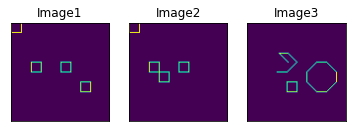

In [5]:
# VISUALIZE IMAGES
plt.subplot(1,3,1)
plt.xticks([],[])
plt.yticks([],[])
plt.title("Image1")
plt.imshow(img1)

plt.subplot(1,3,2)
plt.xticks([],[])
plt.yticks([],[])
plt.title("Image2")
plt.imshow(img2)

plt.subplot(1,3,3)
plt.xticks([],[])
plt.yticks([],[])
plt.title("Image3")
plt.imshow(img3)

In [6]:
# FUNCTION TO GET NO. OF SHAPES IN ANY IMAGE
def getNumFig(img): 
    # location for neighboring pixels, a-> x_axis, b->y_axis
    a = [-1, -1, -1, 0, 1, 0, 1, 1]
    b = [-1, 1, 0, -1, -1, 1, 0, 1]

    (r,c) = (img.shape[0], img.shape[1]) # get no. of rows and columns of image
    checked = np.zeros_like(img) # create an array of shape as image, with all zero values 
    out = 0  # a variable to store count of shapes
    for i in range(r): # loop for each row
        for j in range(c): # loop for each column
            if img[i][j] == 1 and not checked[i][j]: # condition if the current pixel is 1 with no checked
                index = [] 
                index.append((i, j))  # append tuple of curent location i and j in index
                checked[i][j] = 1 # set checked is 1 for current location i and j
                while index: # loop till index is empty
                    x, y = index.pop(0) # remove (pop) first position value of index
                    for p in range(len(a)): # loop over length of all neighbour possibilities
                        if (x+a[p] >= 0 and x+a[p] < len(checked)) and \
                        (y+b[p] >= 0 and y+b[p] < len(checked[0])) and\
                        img[x+a[p]][y+b[p]] == 1 and not checked[x+a[p]][y+b[p]]: # condition for valid position    
                            checked[x + a[p]][y + b[p]] = 1 # update checked location
                            index.append((x + a[p], y + b[p])) #append current location into index
                out += 1
 
    return out

print("total no. of shapes")
print("Image1:",getNumFig(img1)) # output for Image1
print("Image2:",getNumFig(img2)) # output for Image2
print("Image3:",getNumFig(img3)) # output for Image3

total no. of shapes
Image1: 4
Image2: 3
Image3: 3
